In [2]:
%load_ext autoreload
%autoreload 2

In [51]:
# import sys
# sys.path.append("..")

from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from helpers.categories import get_categories_dict
from helpers.files import save_csv, load_csv
from helpers.json_helper import load_tokenized_text, save_frequent_tokens_dict

In [52]:
gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
videos = pd.concat([gb_non_videos, us_non_videos])
videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

In [53]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'new_category_id', 'publish_time',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'description_len', 'title_len', 'channel_title_len',
       'publish_time_day_of_week', 'publish_time_hour_of_day',
       'movie_domains_count'],
      dtype='object')

In [55]:
from imgprocessing.image_size import ImageSize

# data_path = "non_trending"
# gb_videos = pd.read_csv(os.path.join(data_path, "GB_videos_5p.csv"), sep=";", index_col=0)
# us_videos = pd.read_csv(os.path.join(data_path, "US_videos_5p.csv"), sep=";", index_col=0)
# videos = pd.concat([gb_videos, us_videos])
# videos = videos.rename(columns={"description ":"description"})
# videos.head(10)

size = ImageSize.hqdefault.default
images_path = os.path.join("../non_trending")
gb_images = pd.read_csv(os.path.join(images_path, f"GB_{size}.csv"), sep=";", index_col=0)
us_images = pd.read_csv(os.path.join(images_path, f"US_{size}.csv"), sep=";", index_col=0)

videos_images = pd.concat([gb_images, us_images])
videos_images = videos_images.rename(columns={"description ":"description"})
videos_images.head(10)
# videos_images.iloc[1,2]

,number,id,thumbnail_path,error,status
0,0,Ys9ziXRfEMw,../non_trending/default/0_GB_Ys9ziXRfEMw.jpg,False,200
0,1,jO2HEVc5iK4,../non_trending/default/1_GB_jO2HEVc5iK4.jpg,False,200
0,2,yZ3GlUDdrqg,../non_trending/default/2_GB_yZ3GlUDdrqg.jpg,False,200
0,3,bHBDXe96wbg,../non_trending/default/3_GB_bHBDXe96wbg.jpg,False,200
0,4,c1r6rCp8heA,../non_trending/default/4_GB_c1r6rCp8heA.jpg,False,200
0,5,r8T7XvxXAMA,../non_trending/default/5_GB_r8T7XvxXAMA.jpg,False,200
0,6,vpJgTy8Wi_c,../non_trending/default/6_GB_vpJgTy8Wi_c.jpg,False,200
0,7,FF8DPhJRIVw,../non_trending/default/7_GB_FF8DPhJRIVw.jpg,False,200
0,8,Rq1FERyVfLc,../non_trending/default/8_GB_Rq1FERyVfLc.jpg,False,200
0,9,WztARditYYk,../non_trending/default/9_GB_WztARditYYk.jpg,False,200


../non_trending/default/1_GB_jO2HEVc5iK4.jpg


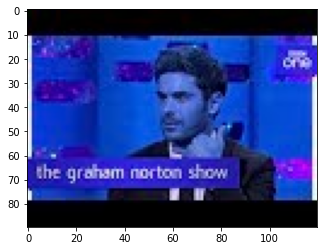

In [56]:
###### test cell
from helpers.files import save_csv, load_csv
import pandas as pd
import cv2

# df = pd.DataFrame()

# df = load_csv('images_data')
# df = videos_images.thumbnail_path
# df = videos_images
# df.head(10)
# df[0]
# path = eval(df[0].iloc[1,3])[0]

# path = path.replace("maxres","").replace("\\","/")

path = videos_images.iloc[1,2]
print(path)
img = cv2.imread(path)
# print(img)

# print(img.shape)
plt.imshow(img)
plt.show()


In [57]:
import numpy as np
from helpers.image_features import *

videos_images["gray_mean_score"] = np.nan
videos_images["color_mean_score"] = np.nan
videos_images["gray_hist_score"] = np.nan
videos_images["red_hist_score"] = np.nan
videos_images["green_hist_score"] = np.nan
videos_images["blue_hist_score"] = np.nan
videos_images["edges_score"] = np.nan
videos_images["entropy_score"] = np.nan


In [58]:
videos_images.head()

,number,id,thumbnail_path,error,status,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,green_hist_score,blue_hist_score,edges_score,entropy_score
0,0,Ys9ziXRfEMw,../non_trending/default/0_GB_Ys9ziXRfEMw.jpg,False,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,jO2HEVc5iK4,../non_trending/default/1_GB_jO2HEVc5iK4.jpg,False,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,yZ3GlUDdrqg,../non_trending/default/2_GB_yZ3GlUDdrqg.jpg,False,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,bHBDXe96wbg,../non_trending/default/3_GB_bHBDXe96wbg.jpg,False,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,c1r6rCp8heA,../non_trending/default/4_GB_c1r6rCp8heA.jpg,False,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data = videos_images
for index in range(data.shape[0]):
# for index in range(100):
    if not data["error"].iloc[index]:
        image_path = data["thumbnail_path"].iloc[index]
        # low_path = image_path.replace("maxres","").replace("\\","/")
        img = cv2.imread(image_path)
        if (img is None) or (img.shape[:2] != (90,120)): continue
        img = img[11:-11,:]
        
        data["gray_mean_score"].iloc[index] = get_gray_score(img)
        data["color_mean_score"].iloc[index] = get_color_score(img)

        gr,cols = get_hist_score(img)
        r,g,b = cols
        data["gray_hist_score"].iloc[index] = gr
        data["red_hist_score"].iloc[index] = r
        data["green_hist_score"].iloc[index] = g
        data["blue_hist_score"].iloc[index] = b

        data["edges_score"].iloc[index] = get_edges_score(img)
        data["entropy_score"].iloc[index] = get_entr_score(img)



/home/michal/.virtualenvs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
data

,number,id,thumbnail_path,error,status,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,green_hist_score,blue_hist_score,edges_score,entropy_score
0,0,Ys9ziXRfEMw,../non_trending/default/0_GB_Ys9ziXRfEMw.jpg,False,200,1316522.0,1009221.0,4082.161377,3991.092041,4066.145508,4080.070801,1678382.0,268.827136
0,1,jO2HEVc5iK4,../non_trending/default/1_GB_jO2HEVc5iK4.jpg,False,200,1306326.0,1261541.0,7457.428711,7379.094238,6600.385742,7526.989258,1679135.0,204.764215
0,2,yZ3GlUDdrqg,../non_trending/default/2_GB_yZ3GlUDdrqg.jpg,False,200,1413625.0,1013739.0,6056.108398,4738.089844,5684.890625,6634.995117,1679503.0,212.400183
0,3,bHBDXe96wbg,../non_trending/default/3_GB_bHBDXe96wbg.jpg,False,200,879521.0,1042526.0,5041.666992,4275.671875,4332.994629,5690.968262,1678818.0,282.548335
0,4,c1r6rCp8heA,../non_trending/default/4_GB_c1r6rCp8heA.jpg,False,200,1413248.0,1077346.0,5978.604980,4344.002930,5672.919922,4434.838379,1679186.0,237.172063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4630,EZ1ncb_qoA8,../non_trending/default/4630_US_EZ1ncb_qoA8.jpg,False,200,1385831.0,1263580.0,8676.604492,7445.422852,8695.023438,7336.640625,1679632.0,858.954582
0,4631,vTpLtNdXDgk,../non_trending/default/4631_US_vTpLtNdXDgk.jpg,False,200,1249792.0,1498200.0,10382.649414,10158.397461,10075.590820,10270.729492,1680025.0,1306.691340
0,4632,KeMW2Asu8vg,../non_trending/default/4632_US_KeMW2Asu8vg.jpg,False,200,1222591.0,1160625.0,10321.742188,5270.499023,9987.557617,10493.090820,1679859.0,974.614346
0,4633,xrWvPo-KaVs,../non_trending/default/4633_US_xrWvPo-KaVs.jpg,False,200,1258383.0,1399843.0,11744.349609,11450.826172,11940.287109,11208.340820,1680288.0,1805.569271


In [61]:
save_csv('reference_images',[data], ['non_trending_data'])
save_csv('images_data_non_trending',[data],['non_trending_data'])

In [62]:
df2 = load_csv('images_data_non_trending')

In [63]:
df2[0]

,number,id,thumbnail_path,error,status,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,green_hist_score,blue_hist_score,edges_score,entropy_score
0,0,Ys9ziXRfEMw,../non_trending/default/0_GB_Ys9ziXRfEMw.jpg,False,200,1316522.0,1009221.0,4082.161377,3991.092041,4066.145508,4080.070801,1678382.0,268.827136
0,1,jO2HEVc5iK4,../non_trending/default/1_GB_jO2HEVc5iK4.jpg,False,200,1306326.0,1261541.0,7457.428711,7379.094238,6600.385742,7526.989258,1679135.0,204.764215
0,2,yZ3GlUDdrqg,../non_trending/default/2_GB_yZ3GlUDdrqg.jpg,False,200,1413625.0,1013739.0,6056.108398,4738.089844,5684.890625,6634.995117,1679503.0,212.400183
0,3,bHBDXe96wbg,../non_trending/default/3_GB_bHBDXe96wbg.jpg,False,200,879521.0,1042526.0,5041.666992,4275.671875,4332.994629,5690.968262,1678818.0,282.548335
0,4,c1r6rCp8heA,../non_trending/default/4_GB_c1r6rCp8heA.jpg,False,200,1413248.0,1077346.0,5978.604980,4344.002930,5672.919922,4434.838379,1679186.0,237.172063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4630,EZ1ncb_qoA8,../non_trending/default/4630_US_EZ1ncb_qoA8.jpg,False,200,1385831.0,1263580.0,8676.604492,7445.422852,8695.023438,7336.640625,1679632.0,858.954582
0,4631,vTpLtNdXDgk,../non_trending/default/4631_US_vTpLtNdXDgk.jpg,False,200,1249792.0,1498200.0,10382.649414,10158.397461,10075.590820,10270.729492,1680025.0,1306.691340
0,4632,KeMW2Asu8vg,../non_trending/default/4632_US_KeMW2Asu8vg.jpg,False,200,1222591.0,1160625.0,10321.742188,5270.499023,9987.557617,10493.090820,1679859.0,974.614346
0,4633,xrWvPo-KaVs,../non_trending/default/4633_US_xrWvPo-KaVs.jpg,False,200,1258383.0,1399843.0,11744.349609,11450.826172,11940.287109,11208.340820,1680288.0,1805.569271
